# Project: Investigate a Gapminder Dataset revolving around Electricity Use and Generation

Author: John CALAUNAN

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#mods">Modifications</a></li>
<li><a href="#refs">References</a></li>
</ul>

---------------------------------------------------------------------------
<a id='intro'></a>
## Introduction

The analysis of this project is based off the datasets from Gapminder. Of particular interest is electricity, specifically its generation, overall consumption and how much of that are from residents.
Interesting facts to investigate would be:
- What country produces the most electricity, and do they consistently provide it?
- Who consumes the most?
- What are the proportions of electricity use overall and from the population?
- Which country is on the brink of not being able to meet demand?

**Install custom library, see below**

In [1]:
# Use % pip install pycountry to install new library

#  Import libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # used for basic plotting
%matplotlib inline  
#  Sets the backend of matplotlib to the 'inline' backend
import seaborn as sns # used for final visualization of results
import pycountry as pc # used to check the country entries

---------------------------------------------------------------------------
<a id='wrangling'></a>
## Data Wrangling


### General Properties

The source data is to be obtained from Gapminder.org. 
Data sets of interest are Energy use and Energy.
Updated as of 2020/09/12.

### Data Ingestion

Download total population csv from Gapminder.org -> population indicator, repeat for Electricity use per person and Electricity generation per person.

In [2]:
# List of CSV file names
filename=['population_total.csv',
          'electricity_use_per_person.csv',
          'residential_electricity_use_per_person.csv',
          'electricity_generation_per_person.csv']

# Initialise empty list
df_list = []

# Use for loop to repeat pd.read_csv, refer to references.
for file in filename:
    df_list.append(pd.read_csv(file))
    
pop_df = df_list[0]
eup_df = df_list[1]
reup_df = df_list[2]
egp_df = df_list[3]


#### Structure of df_list[#]:
0. Population total, 
1. Electricity use per person, 
2. Residential electricity use per person
3. Electricity generation per person 

#### Initial Investigation
##### Population dataframe

In [3]:
# Analyse Population data frame
pop_df.shape

(195, 302)

In [4]:
pop_df.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000


In [5]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


Check for duplicates in country

In [6]:
pop_df.country.duplicated().sum()

0

Show high level statistics of Population dataframe

In [7]:
pop_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,5.038229e+06,5.055872e+06,5.074643e+06,5.092072e+06,5.105055e+06,5.128710e+06,5.143516e+06,5.167424e+06,5.186405e+06,5.199982e+06,...,5.528046e+07,5.535238e+07,5.540466e+07,5.546472e+07,5.545987e+07,5.554347e+07,5.555948e+07,5.558613e+07,5.555776e+07,5.559454e+07
std,2.779946e+07,2.792217e+07,2.802129e+07,2.814397e+07,2.820672e+07,2.836602e+07,2.842957e+07,2.858907e+07,2.871284e+07,2.877567e+07,...,1.538179e+08,1.535317e+08,1.533571e+08,1.530868e+08,1.524209e+08,1.525998e+08,1.519851e+08,1.516808e+08,1.510089e+08,1.508515e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,7.890000e+02,7.900000e+02,7.900000e+02,7.910000e+02,7.910000e+02,7.930000e+02,7.960000e+02,7.960000e+02,7.950000e+02,7.970000e+02
25%,1.285000e+05,1.285000e+05,1.285000e+05,1.290000e+05,1.290000e+05,1.290000e+05,1.275000e+05,1.270000e+05,1.270000e+05,1.270000e+05,...,2.125000e+06,2.130000e+06,2.130000e+06,2.125000e+06,2.110000e+06,2.090000e+06,2.075000e+06,2.060000e+06,2.040000e+06,2.025000e+06
50%,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,...,1.090000e+07,1.090000e+07,1.090000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
75%,2.200000e+06,2.200000e+06,2.195000e+06,2.195000e+06,2.195000e+06,2.175000e+06,2.145000e+06,2.145000e+06,2.145000e+06,2.145000e+06,...,4.745000e+07,4.755000e+07,4.765000e+07,4.755000e+07,4.720000e+07,4.685000e+07,4.655000e+07,4.655000e+07,4.655000e+07,4.660000e+07
max,3.300000e+08,3.320000e+08,3.330000e+08,3.350000e+08,3.360000e+08,3.380000e+08,3.390000e+08,3.410000e+08,3.430000e+08,3.440000e+08,...,1.510000e+09,1.500000e+09,1.500000e+09,1.490000e+09,1.480000e+09,1.480000e+09,1.470000e+09,1.460000e+09,1.450000e+09,1.450000e+09


####  General overview
##### Population dataframe:
- Shape: There are 194 countries and 300 years recorded.
- Info: .info was too lengthy to show all the columns, difficult to extrapolate any useful information.
- Datatypes: Two types, int and string. Investigation of strings in country to be checked during cleaning process.
- Date range: Year ranges begins at 1800 and exceeds the current year, 2020, as it extends til 2100. It is assumed the Population data is intentionally filled in for all countries based on the initial high level overview.
- Duplicates: None present in the country column, year column will be checked during the cleaning process.
Comments:
Upon first inspection, the dataframe schema is not in a suitable format for manipulation for the following reasons:
- Arrangement of years as individual columns, this can be consolidated into one with the heading Years.
- The values underneath the years column represent the population of each row of countries, as above this data should be under one column named Population.

##### Investigate Electrical use dataframe

In [8]:
eup_df.shape

(138, 56)

In [9]:
eup_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1720.0,1220.0,1210.0,1620.0,1840.0,1940.0,2210.0,2120.0,2530.0,2310.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,891.0,862.0,894.0,947.0,866.0,1020.0,1120.0,1240.0,1280.0,1360.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,145.0,133.0,172.0,189.0,206.0,207.0,219.0,280.0,312.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2410.0,2370.0,2460.0,2770.0,2730.0,2880.0,2930.0,3000.0,2970.0,3070.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1520.0,1640.0,1770.0,1670.0,1660.0,1730.0,1810.0,1890.0,1930.0,1960.0


In [10]:
eup_df.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
133,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2890.0,3000.0,3020.0,3130.0,3090.0,3200.0,3260.0,3300.0,3300.0,2720.0
134,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,570.0,645.0,728.0,803.0,906.0,1020.0,1100.0,1210.0,1280.0,1420.0
135,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,184.0,194.0,211.0,230.0,227.0,255.0,194.0,194.0,251.0,220.0
136,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,693.0,705.0,664.0,590.0,568.0,591.0,632.0,733.0,747.0,717.0
137,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,892.0,872.0,760.0,628.0,585.0,607.0,636.0,609.0,629.0,609.0


Use iloc to sift to the data as head and tail checks reveal a predominant quantity of NaN.

In [11]:
eup_df.iloc[95:100]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
95,Paraguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,860.0,916.0,979.0,1030.0,1090.0,1170.0,1270.0,1360.0,1460.0,1550.0
96,Peru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,830.0,883.0,967.0,1040.0,1050.0,1110.0,1260.0,1240.0,1300.0,1350.0
97,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,568.0,582.0,585.0,589.0,638.0,643.0,664.0,683.0,696.0
98,Poland,905.0,988.0,1060.0,1090.0,1170.0,1250.0,1360.0,1480.0,1590.0,...,3440.0,3580.0,3660.0,3730.0,3590.0,3800.0,3880.0,3900.0,3940.0,3970.0
99,Portugal,320.0,350.0,379.0,410.0,460.0,487.0,543.0,572.0,615.0,...,4680.0,4830.0,4890.0,4850.0,4840.0,4960.0,4850.0,4740.0,4690.0,4660.0


In [12]:
eup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  138 non-null    object 
 1   1960     25 non-null     float64
 2   1961     25 non-null     float64
 3   1962     25 non-null     float64
 4   1963     25 non-null     float64
 5   1964     25 non-null     float64
 6   1965     26 non-null     float64
 7   1966     26 non-null     float64
 8   1967     26 non-null     float64
 9   1968     26 non-null     float64
 10  1969     26 non-null     float64
 11  1970     26 non-null     float64
 12  1971     109 non-null    float64
 13  1972     109 non-null    float64
 14  1973     109 non-null    float64
 15  1974     109 non-null    float64
 16  1975     109 non-null    float64
 17  1976     109 non-null    float64
 18  1977     109 non-null    float64
 19  1978     109 non-null    float64
 20  1979     109 non-null    float64
 21  1980     109 non

Check for duplicates in country

In [13]:
eup_df.country.duplicated().sum()

0

In [14]:
eup_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,2155.372000,2289.996000,2451.080000,2651.320000,2903.800000,3007.653846,3161.192308,3302.461538,3511.269231,3776.730769,...,3951.070803,4044.461314,4119.424088,4195.063504,4067.683212,4231.516788,4218.528467,4252.123358,4260.737226,4256.132117
std,1825.624001,1926.228229,2093.745585,2262.457674,2552.964388,2685.484209,2769.797408,2849.027135,3004.571564,3078.408310,...,5024.093021,5155.244733,5373.449700,5949.292730,5866.523012,5998.902980,5953.429897,6012.276741,6078.694265,6020.448971
min,92.300000,96.900000,112.000000,121.000000,132.000000,144.000000,157.000000,170.000000,185.000000,206.000000,...,33.500000,34.900000,25.500000,23.700000,35.900000,24.500000,31.300000,41.400000,43.000000,39.100000
25%,975.000000,1050.000000,1140.000000,1270.000000,1350.000000,1300.000000,1412.500000,1532.500000,1647.500000,1757.500000,...,693.000000,705.000000,728.000000,734.000000,728.000000,743.000000,697.000000,733.000000,774.000000,812.000000
50%,1590.000000,1680.000000,1790.000000,1920.000000,2060.000000,2175.000000,2280.000000,2360.000000,2590.000000,2825.000000,...,2050.000000,2180.000000,2250.000000,2320.000000,2200.000000,2370.000000,2410.000000,2430.000000,2510.000000,2580.000000
75%,2610.000000,2870.000000,2900.000000,3080.000000,3250.000000,3465.000000,3595.000000,3660.000000,3827.500000,4057.500000,...,5530.000000,5830.000000,5800.000000,5810.000000,5630.000000,5520.000000,5600.000000,5530.000000,5410.000000,5360.000000
max,7680.000000,8400.000000,9390.000000,9660.000000,10600.000000,11400.000000,11700.000000,12300.000000,13500.000000,13200.000000,...,28000.000000,31300.000000,36900.000000,50100.000000,51300.000000,51400.000000,52400.000000,53200.000000,54800.000000,53800.000000


##### Function - Set the size of ticks and fonts

In [15]:
def set_xticks(xrot,xsize,align):
    ax=plt.xticks(rotation=xrot,
                  horizontalalignment=align,
                  size=xsize)
    return ax;

# Set Seaborn 
def set_yticks(yrot,ysize,align):
    ax=plt.yticks(rotation=yrot,
                  horizontalalignment=align,
                  size=ysize)
    return ax;

# Size fonts
def plotfontsize(font,title_size,axes):
    ax=sns.set(style="whitegrid",
                       rc={"font.size":font,
                           "axes.titlesize":title_size,
                           "axes.labelsize":axes})
    return ax;

##### Function - Plot a heatmap

In [16]:
# Define a function to plot the heatmaps of a dataframe
def plot_heatmap(df,tname):
    # setup
    sns.set(style='whitegrid')
    
    hm_df=sns.heatmap(df, 
                square=True,
                robust=True,
                linewidths=0.005,
                cbar_kws={'fraction' : 0.03},
                xticklabels=1, yticklabels=1,
                vmax=df.max().max(),
                vmin=df.min().min());
    
    # labels
    hm_df.set(xlabel='Year',
               ylabel='Countries',
               title=tname);
    return hm_df;

Heatmaps were previously atttempted on Population however the range of rows and columns made it unreadable and better suits the remaining dataframes. Purpose of the heatmap allows for a quick visual overview of the raw dataset, which better represented than using a histogram. 

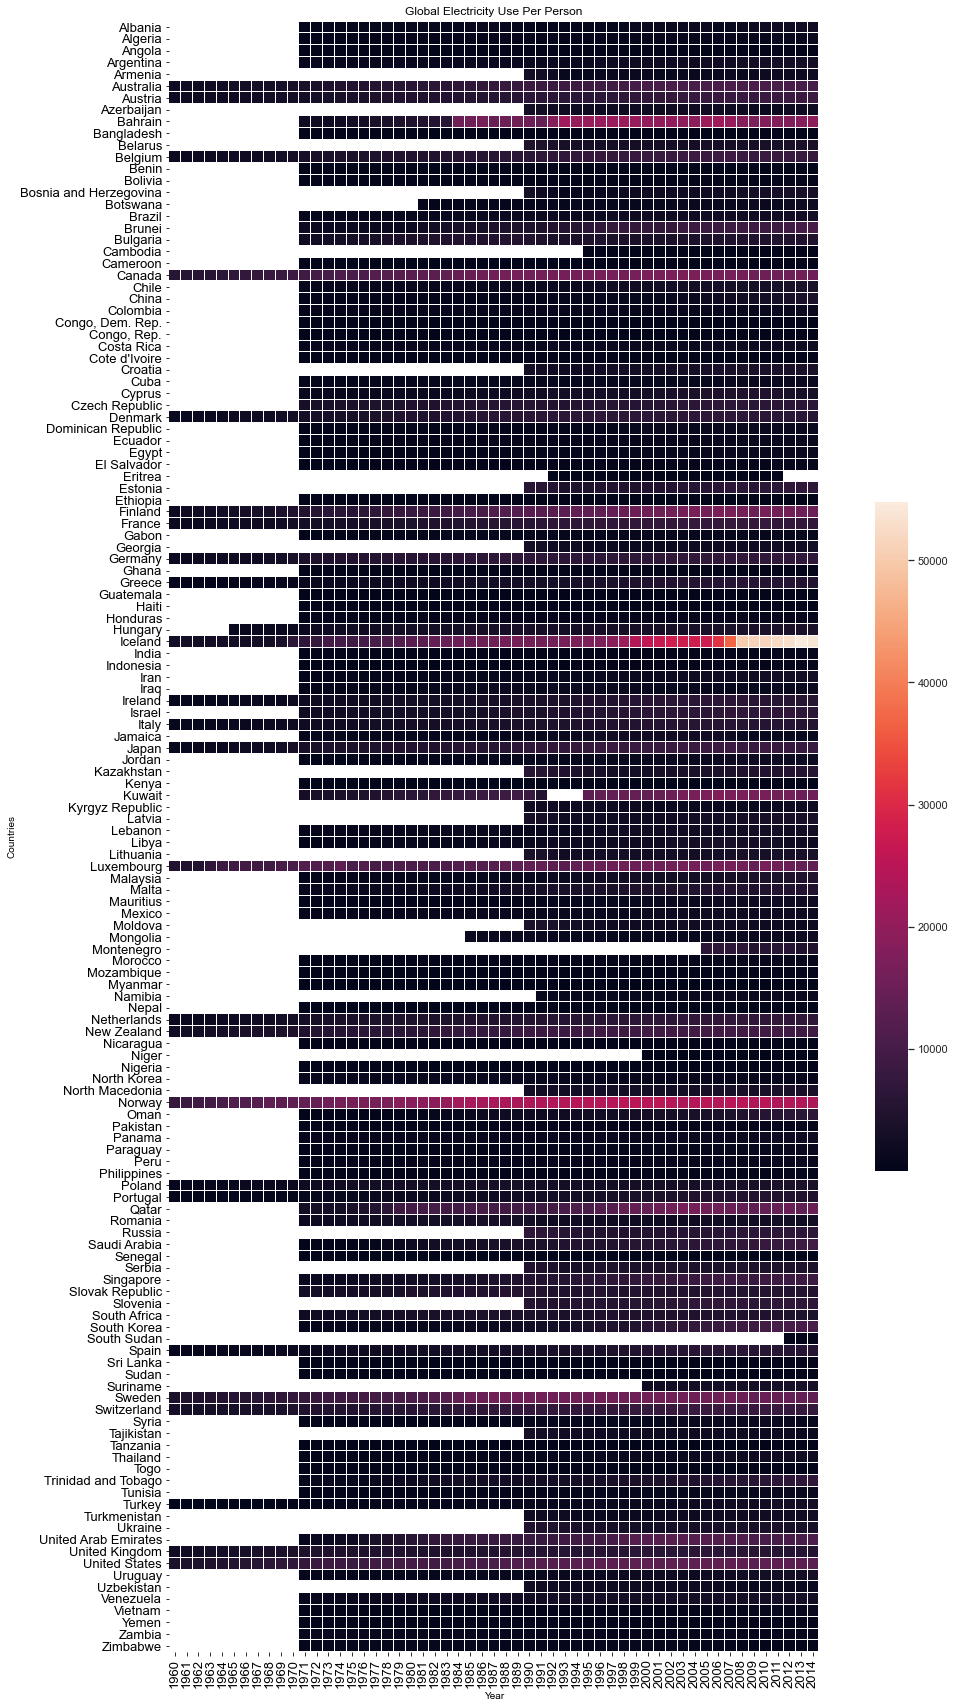

In [17]:
# Optimal size for the quantity of countries
plt.subplots(figsize=(20,30)) # set figure size
set_xticks(0,13,'center') # set size and justify
set_yticks(0,13,'right')
idx_eup_df = eup_df.set_index('country') # remove the index

plotfontsize(20,36,20) # call function

plot_heatmap(idx_eup_df,'Global Electricity Use Per Person'); # call function

##### Electricity use per person dataframe:
- Shape: There are 137 countries and 54 years recorded.
- Info: .info was too lengthy to show all the columns, difficul to extrapolate any useful information.
- Datatypes: Two types, float and string. Investigation of strings in country to be checked during cleaning process.
- Date range: Year ranges begins at 1960 and extends til 2014.
- Duplicates: None present in the country column, year column will be checked during the cleaning process. Comments: Upon first inspection, the dataframe schema is not in a suitable format for manipulation for the following reasons:
- Arrangement of years as individual columns, this can be consolidated into one with the heading Years.
- The values underneath the years column represent the population of each row of countries, as above this data should be under one column named Population.


##### Investigate Residential electrical use dataframe

In [18]:
reup_df.shape

(130, 50)

In [19]:
reup_df.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
125,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648.0,645.0,667.0,684.0,674.0,680.0,736.0,798.0,827.0,969.0
126,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.0,141.0,160.0,180.0,196.0,221.0,233.0,257.0,275.0,303.0
127,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.6,84.8,88.5,94.5,101.0,105.0,96.5,116.0,123.0,130.0
128,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110.0,113.0,117.0,123.0,128.0,133.0,136.0,144.0,169.0,169.0
129,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,192.0,197.0,198.0,209.0,227.0,239.0,285.0,283.0,299.0,298.0


In [20]:
reup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  130 non-null    object 
 1   1960     24 non-null     float64
 2   1961     24 non-null     float64
 3   1962     24 non-null     float64
 4   1963     24 non-null     float64
 5   1964     24 non-null     float64
 6   1965     25 non-null     float64
 7   1966     25 non-null     float64
 8   1967     25 non-null     float64
 9   1968     25 non-null     float64
 10  1969     25 non-null     float64
 11  1970     25 non-null     float64
 12  1971     94 non-null     float64
 13  1972     93 non-null     float64
 14  1973     95 non-null     float64
 15  1974     95 non-null     float64
 16  1975     97 non-null     float64
 17  1976     98 non-null     float64
 18  1977     98 non-null     float64
 19  1978     98 non-null     float64
 20  1979     98 non-null     float64
 21  1980     100 non

In [21]:
# Check for duplicates in country
reup_df.country.duplicated().sum()

0

In [22]:
reup_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,24.000000,24.000000,24.000000,24.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,454.441667,485.458333,527.937500,569.650000,606.466667,634.628000,687.192000,721.252000,801.604000,851.612000,...,996.968062,1006.171628,1017.432248,1024.659690,1047.016667,1066.294341,1106.180620,1143.611628,1171.478295,1211.600698
std,516.873568,539.730792,588.093427,630.320778,659.107653,696.560261,747.811936,755.418688,849.721864,850.376405,...,1389.807346,1373.348592,1390.251434,1392.133741,1393.698403,1421.374702,1496.338778,1559.623677,1649.090720,1711.370732
min,16.300000,17.300000,18.900000,20.000000,22.800000,24.100000,24.800000,28.600000,31.100000,36.300000,...,7.880000,8.040000,5.960000,8.700000,9.250000,9.970000,10.500000,13.100000,10.100000,9.190000
25%,149.000000,153.500000,171.000000,184.750000,205.500000,234.000000,254.000000,275.000000,299.000000,330.000000,...,151.000000,156.000000,167.000000,171.000000,182.000000,190.000000,217.000000,233.000000,223.000000,239.000000
50%,208.000000,234.000000,270.000000,303.000000,340.500000,363.000000,410.000000,451.000000,489.000000,535.000000,...,479.000000,501.000000,488.000000,492.000000,506.000000,524.000000,573.000000,574.000000,584.000000,615.000000
75%,648.000000,715.000000,774.000000,843.250000,883.750000,905.000000,963.000000,1030.000000,1090.000000,1160.000000,...,1280.000000,1350.000000,1370.000000,1350.000000,1440.000000,1440.000000,1470.000000,1510.000000,1470.000000,1490.000000
max,2270.000000,2340.000000,2620.000000,2820.000000,2970.000000,3170.000000,3410.000000,3450.000000,3810.000000,3720.000000,...,7850.000000,7710.000000,7950.000000,7640.000000,7280.000000,7580.000000,8220.000000,8260.000000,9340.000000,11200.000000


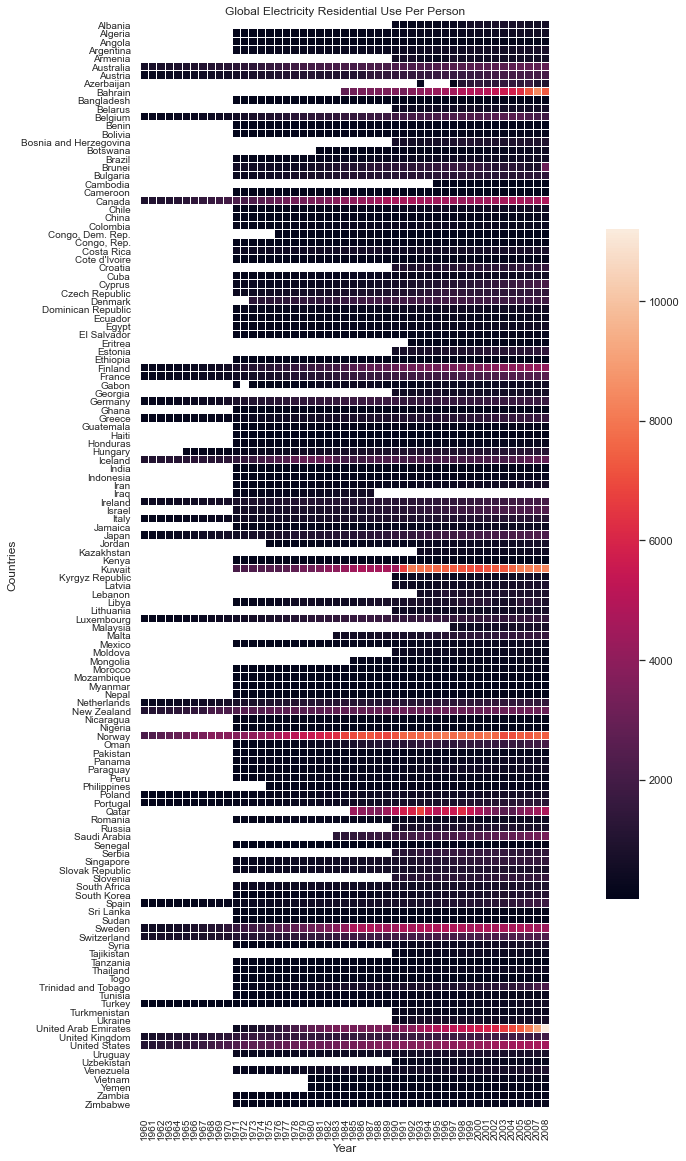

In [23]:
plt.subplots(figsize=(20,20))
set_xticks(0,10,'center')
set_yticks(0,10,'right')

idx_reup_df = reup_df.set_index('country')
plot_heatmap(idx_reup_df,'Global Electricity Residential Use Per Person');

##### Residential electricity use per person (REUP) dataframe:
- Shape: There are 129 countries and 49 years recorded, not consistent with the population dataframe.
- Info: Several NaN values was discovered in the dataframe head and tail checks. A sample within the middle of the population is checked to verify the integrity of the data, general consensus is that some countries were diligent with there records, some possibly lost. Looking through NaN, generally most countries started recording data until 1971 onwards.
- Datatypes: Two types, float and string. Type casting of previous dataframe values to be changed. As per previous comments, country is to be checked. 
- Date range: Years range from 1960 to 2008.
- Duplicates: No duplicates.
- Same comments above regarding years and value column
- Units for electricity used are based on kWh

##### Investigate Electrical generation dataframe

In [24]:
egp_df.shape

(65, 33)

In [25]:
egp_df.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,544.0,559.0,532.0,568.0,607.0,621.0,653.0,673,699,...,1090,1150,1220,1270,1440,1530,1560,1640,1730,1730
1,Argentina,1490.0,1590.0,1660.0,1670.0,1580.0,1560.0,1620.0,1680,1810,...,2880,3190,3180,3210,3110,3230,3280,3290,3350,3350
2,Australia,7860.0,8100.0,8360.0,8670.0,9020.0,9130.0,9150.0,9230,9350,...,11600,11500,11500,11300,11400,11000,10800,10500,10600,10600
3,Austria,5850.0,5860.0,6610.0,6400.0,6530.0,6530.0,6620.0,6540,6670,...,7800,8030,8250,8450,7780,8500,7930,7540,7480,7760
4,Azerbaijan,3110.0,3180.0,3320.0,3360.0,3270.0,3200.0,3170.0,2630,2520,...,2500,2450,2110,2070,2220,2480,2490,2600,2570,2570


In [26]:
egp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  65 non-null     object 
 1   1985     65 non-null     float64
 2   1986     65 non-null     float64
 3   1987     65 non-null     float64
 4   1988     65 non-null     float64
 5   1989     65 non-null     float64
 6   1990     65 non-null     float64
 7   1991     65 non-null     float64
 8   1992     65 non-null     int64  
 9   1993     65 non-null     int64  
 10  1994     65 non-null     float64
 11  1995     65 non-null     int64  
 12  1996     65 non-null     float64
 13  1997     65 non-null     float64
 14  1998     65 non-null     int64  
 15  1999     65 non-null     int64  
 16  2000     65 non-null     int64  
 17  2001     65 non-null     int64  
 18  2002     65 non-null     int64  
 19  2003     65 non-null     int64  
 20  2004     65 non-null     int64  
 21  2005     65 non-nu

In [27]:
# Check for duplicates in country, two methods by duplicated
egp_df.country.duplicated().sum()

0

In [28]:
egp_df.describe()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,4436.643077,4518.247692,4676.740000,4785.658462,4865.303077,4902.443077,4876.616923,4889.507692,4980.015385,5060.018462,...,6310.200000,6300.292308,6092.000000,6226.292308,6184.030769,6294.615385,6181.138462,6188.215385,6258.076923,6297.446154
std,4502.845476,4411.724256,4608.929693,4725.618579,4834.170391,4849.783906,4658.008029,4771.745861,4889.163510,4897.816629,...,5428.514317,5381.983474,5051.220205,5042.250650,4993.938967,5291.733975,4956.454753,5046.927099,5110.798232,5135.922644
min,48.600000,50.100000,56.800000,64.800000,68.700000,72.800000,76.100000,80.000000,81.000000,84.200000,...,211.000000,230.000000,247.000000,268.000000,287.000000,312.000000,337.000000,350.000000,377.000000,414.000000
25%,1150.000000,1200.000000,1240.000000,1320.000000,1370.000000,1370.000000,1470.000000,1530.000000,1600.000000,1630.000000,...,2500.000000,2600.000000,2730.000000,2620.000000,2680.000000,2750.000000,2820.000000,2890.000000,2820.000000,2800.000000
50%,3390.000000,3620.000000,3710.000000,3760.000000,3880.000000,3970.000000,3930.000000,3960.000000,3840.000000,3970.000000,...,5170.000000,5120.000000,4860.000000,5040.000000,5060.000000,5010.000000,4910.000000,4750.000000,4760.000000,5030.000000
75%,5780.000000,5910.000000,6270.000000,6400.000000,6530.000000,6750.000000,6790.000000,6540.000000,6540.000000,6530.000000,...,8300.000000,8010.000000,8250.000000,8700.000000,8280.000000,8500.000000,8220.000000,8110.000000,8050.000000,7890.000000
max,24900.000000,23300.000000,24900.000000,26200.000000,28200.000000,28700.000000,26000.000000,27400.000000,27800.000000,26100.000000,...,29100.000000,29800.000000,27300.000000,25300.000000,25800.000000,29500.000000,26400.000000,27600.000000,27800.000000,28500.000000


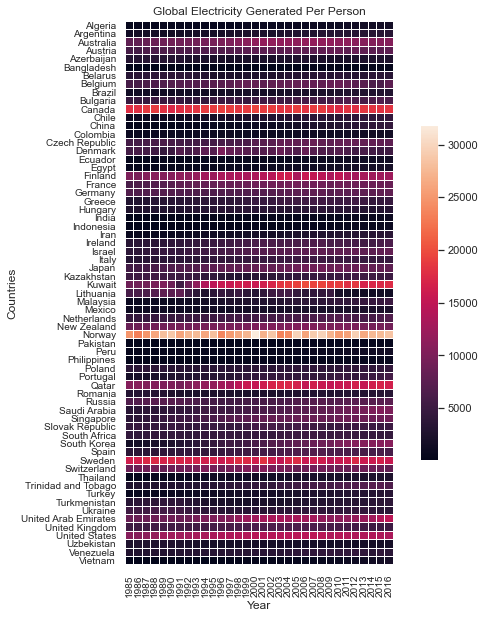

In [29]:
plt.subplots(figsize=(10,10))
set_xticks(0,10,'center')
set_yticks(0,10,'right')

# remove number index and set country as new index
idx_egp_df = egp_df.set_index('country')

# Call fuction to plot heatmap
plot_heatmap(idx_egp_df,'Global Electricity Generated Per Person');

##### Electricity generation per person (EGP) dataframe:
- Shape: 65 Countries and 31 are years recorded. Years will most likely be trimmed to suit.
- Info: All columns are filled out, no null values or blank cells.
- Data types: Strings are present, however there is a mix between int and floats. Will be type casted during cleaning
- Date range: Years range from 1985 to 2016.
- Duplicates: No duplicates.
- Same comments above regarding years and value column
- Units for electricity generated are based on kWh

### Data Cleaning
From the general overview of the above, cleaning will involve:
- Type cast to floats for consistency.
- Trim the years, we cannot make up/fill the NaN present in the earlier years as it was not recorded and would affect the results negatively. **Note: This will be achieved using a inner join to drop**
- Years and respective population, electricity use, residential electricity use and electricity generation converted into columns.
- String check of countries to ensure name convention is correct i.e. not mispelt.
- Re-check for duplicates.
- Analyse countries, why are there uneven columns.
- Remove country names not present between ##.
- Consolidate into one table.
- Ensure columns join to match the correct country and respective year.

Using previous workflow from excel, i.e. running a simulation using excel power query required the following steps to be achieved to normalize the data:
- Unpivot all other columns except the country column.
- Research for the python, pandas equivalent let to the discovery of melt() function.

In [30]:
# Before all the cleaning, keep original saved
old_pop_df=pop_df
old_eup_df=eup_df
old_reup_df=reup_df
old_egp_df=egp_df

#### Clean Country Column
Based on the shapes provided in the overview for the 4 dataframes, the smallest quantity of rows is in the Electricity Generation per person (EGP) dataframe.
These list of countries will serve as the basis for the number of countries as we are unable to fill in the remaining figures of the other countries with no concrete information or domain knowledge.

There a a few rows to analyse, thus we are able to use enumerate to further investigate the list of countries per dataframe individually, starting with the one with the least.

##### Clean Electricity generation per person (EGP) dataframe

In [31]:
# Check countries in  Elec. Generation
for i, count in enumerate(egp_df['country']):
    print(i, count)

0 Algeria
1 Argentina
2 Australia
3 Austria
4 Azerbaijan
5 Bangladesh
6 Belarus
7 Belgium
8 Brazil
9 Bulgaria
10 Canada
11 Chile
12 China
13 Colombia
14 Czech Republic
15 Denmark
16 Ecuador
17 Egypt
18 Finland
19 France
20 Germany
21 Greece
22 Hungary
23 India
24 Indonesia
25 Iran
26 Ireland
27 Israel
28 Italy
29 Japan
30 Kazakhstan
31 Kuwait
32 Lithuania
33 Malaysia
34 Mexico
35 Netherlands
36 New Zealand
37 Norway
38 Pakistan
39 Peru
40 Philippines
41 Poland
42 Portugal
43 Qatar
44 Romania
45 Russia
46 Saudi Arabia
47 Singapore
48 Slovak Republic
49 South Africa
50 South Korea
51 Spain
52 Sweden
53 Switzerland
54 Thailand
55 Trinidad and Tobago
56 Turkey
57 Turkmenistan
58 Ukraine
59 United Arab Emirates
60 United Kingdom
61 United States
62 Uzbekistan
63 Venezuela
64 Vietnam


Using enumerate to find the index (55), Trinidad and Tobago is a combined entry. 

Looking up the country naming convention will be required to determine its validity and if it can be split as a separate row with identical values.

Searching on google, we can utilize the pycountry library, the built in standardized library will be used to check the country names against the database rather then search for each individual country and check manually.

Link to the library:  https://pypi.org/project/pycountry/

In [32]:
# country naming check, convert to list Title case i.e. Capitalised
input_country_list = egp_df['country'].str.title()

# list to filter inconsistent naming, inserted here
tobe_deleted = []

The above process ensure the case of the entries are corrected prior to being processed into the function below, as the database could potentially have incorrect upper/lower cases that would influence the equality checks.

##### Function - Country filtering

In [33]:
# Credits to the original poster, Richa Monga, this piece of code was obtained on Stackoverflow. 
# It's purpose is to check inconsistencies with the country naming entered in the tables.

def country_name_check():
    pycntrylst = list(pc.countries)
    alpha_2 = []
    alpha_3 = []
    name = []
    common_name = []
    official_name = []
    invalid_countrynames =[]

    for i in pycntrylst:
        alpha_2.append(i.alpha_2)
        alpha_3.append(i.alpha_3)
        name.append(i.name)
        if hasattr(i, "common_name"):
            common_name.append(i.common_name)
        else:
            common_name.append("")
        if hasattr(i, "official_name"):
            official_name.append(i.official_name)
        else:
            official_name.append("")
            
    for j in input_country_list:
        if j not in map(str.title,alpha_2) and j not in map(str.title,alpha_3) and j not in map(str.title,name) and j not in map(str.title,common_name) and j not in map(str.title,official_name):
            invalid_countrynames.append(j)

    invalid_countrynames = list(set(invalid_countrynames))
    invalid_countrynames = [item for item in invalid_countrynames if item not in tobe_deleted]
    
    return print(invalid_countrynames)

**'pycountry'** allows the searching of countries by various methods stated on the pycountry homepage:
1. Getfunction,
2. Search_fuzzy,
3. Indexing i.e. list(pycountry.countries)[0]

Generally the list of countries from pycountry is read and the relevant details are extracted i.e. alpha2, name, etc. 
The **hasattr** breaks **official name** from **name**, as it cannot be obtained using the .get function

A thorough comparison is performed before listing out the names that do not match.

In [34]:
country_name_check()

['Russia', 'Iran', 'South Korea']


In [35]:
checklist_egp = ['South Korea', 'Iran', 'Russia'] # countries to be checked

The countries, Russian, Iran and South Korean are returned from the function above.
This indicates they were not on the **pycountry list**, but however appear to be spelt correctly for the purposes of this analysis.

This function is useful in allowing the use of the **.loc function** to pin-point errors and amend, alternative a separate list, called **tobe_deleted**, can be created to filter or amend the minor inconsistency in naming convention. 

Note: The **tobe_deleted list** is removed from the main function and initialized adjacent to **input_country_list**.

##### Function - Check Country, Print Results of check

In [36]:
# testing one string above
def print_check(country):
    get_check = pc.countries.get(name=country)
    fuzzy_check = pc.countries.search_fuzzy(country)
    print_results(get_check,fuzzy_check) # call function
    
def print_results(print1, print2):
    print('RESULTS:\n\
    Get Output: {} \n\
    Fuzzy Output: {}'.format(print1, print2))

In the cleaning process, we will be understanding why they are returned from the function, which will be achieved using the **pycountry search_fuzzy function**.

In [37]:
# Enter country of interest to check
print_check('Russia') # call function to individually check country

RESULTS:
    Get Output: None 
    Fuzzy Output: [Country(alpha_2='RU', alpha_3='RUS', name='Russian Federation', numeric='643')]


The above **function** calls and checks for the incorrect naming of countries, it will be reused for the cleaning of the remaining two data frames.

The countries to be checked, reveal the problem lay with the naming convention not matching what was in the **pycountry**, such as Russia missing the word 'federation', which is very similar to the remaining listed countries above.

##### Function - Country exemption

Define a function as it will be used 4 times, the function will check exempt naming of a country and print to verify it was added.

In [38]:
def exempt_naming(country):
    tobe_deleted.append(country) # add countries to exempt list
    print(tobe_deleted) # print current list

In [39]:
print(tobe_deleted) # call function to see current exemption list

[]


In [40]:
for i in checklist_egp:
    exempt_naming(i) # add country to exemption list inside, ''

['South Korea']
['South Korea', 'Iran']
['South Korea', 'Iran', 'Russia']


With the countries verified, we will now check for nulls.

In [41]:
egp_df.isna().sum().sum()

0

##### Clean Electricity use per person (EUP) dataframe

Check **EUPs** list of countries based on the method performed on the **EGP dataframe**.
Reinitialize the **input_country_list** with those from the **EUP dataframe**.

In [42]:
input_country_list = eup_df['country'].str.title() # initialize to new dataframe country list
country_name_check() # call previous function with new list

['Congo, Dem. Rep.', "Cote D'Ivoire", 'North Korea', 'Syria', 'Brunei', 'Congo, Rep.']


In [43]:
checklist_eup = ['Syria', 'Iran', 'Russia', 'Congo, Dem. Rep.', 'Brunei', 'South Korea', 'North Korea', "Cote D'Ivoire", 'Congo, Rep.']

The countries listed above are assigned and checked against the **EGP** list of countries.

In [44]:
# use @ to reference variables, rather then use in operator
egp_df.query('country in @checklist_eup')

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
25,Iran,834.0,853.0,880.0,885.0,939.0,1030.0,1090.0,1150,1270,...,2720,2830,2920,3030,3120,3240,3290,3500,3550,3560
45,Russia,6730.0,6950.0,7220.0,7300.0,7330.0,7330.0,7210.0,6800,6440,...,7120,7270,6940,7230,7330,7420,7320,7360,7390,7550
50,South Korea,1540.0,1690.0,1920.0,2210.0,2440.0,2760.0,3030.0,3340,3650,...,8670,8990,9160,9990,10400,10600,10700,10700,10800,10900


Query the **EGP dataframe** based on the list of countries to be checked, reveals the only matching countries are Iran, Russia and South Korea that are present in the **EGP dataframe**. All others can be ignored and do not need to be added to the exempt list and will be handled later in the cleaning process.

In [45]:
eup_df=eup_df.fillna(method='bfill',axis=1) # problem with inplace=True led to errors

Check for nulls.

In [46]:
eup_df.isnull().sum().sum()

3

An additional **forward fill** is required to populate the remaining nulls not covered by the **backfill**.

In [47]:
eup_df=eup_df.fillna(method='ffill',axis=1) # problem with inplace=True, led to errors
eup_df.isnull().sum().sum()

0

##### Clean Residential Use Dataframe

Additional year column 2009 will be added to the residential use dataframe to enable an analysis across a decade, where 2010 is the start of a new decade.

In [48]:
reup_df['2009'] = reup_df['2008']

In [49]:
input_country_list = reup_df['country'].str.title() # initialize to new dataframe country list
country_name_check() # call previous function with new list

['Congo, Dem. Rep.', "Cote D'Ivoire", 'Syria', 'Brunei', 'Congo, Rep.']


The countries listed above are assigned and checked against the **EGP** list of countries.

In [50]:
checklist_reup = ["Cote D'Ivoire", 'Brunei', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Syria']

In [51]:
# use @ to reference variables, rather then use in operator
egp_df.query('country in @checklist_reup')

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016


Query the **EGP dataframe** based on the list of countries to be checked, to reveal there are no relevant countries. 

All countries in in the checklist can be ignored and do not need to be added to the exempt list.

**Backfill** nulls the remaining nulls. There was a problem with inplace=True which caused errors.

In [52]:
reup_df=reup_df.fillna(method='bfill',axis=1)

Check nulls

In [53]:
reup_df.isnull().sum().sum()

22

An additional **forward fill** is required to populate the remaining nulls not covered by the **backfill**.

In [54]:
reup_df=reup_df.fillna(method='ffill',axis=1) # problem with inplace=True led to errors
reup_df.isnull().sum().sum()

0

##### Clean Population Dataframe

Check Populations list of countries

In [55]:
input_country_list = pop_df['country'].str.title()  # initialize to new dataframe country list
country_name_check()

['Congo, Dem. Rep.', 'Palestine', "Cote D'Ivoire", 'Syria', 'St. Lucia', 'Swaziland', 'St. Kitts And Nevis', 'Micronesia, Fed. Sts.', 'Cape Verde', 'North Korea', 'St. Vincent And The Grenadines', 'Brunei', 'Holy See', 'Congo, Rep.']


Inspecting the next list, we see several countries of concern, some require researching on google e.g. Eswatini and Micronesia, whilst other appear to be mispelt, e.g. Cape Verde.

In [56]:
# Enter country of interest to check
print_check('Eswatini') # call function to individually check country

RESULTS:
    Get Output: Country(alpha_2='SZ', alpha_3='SWZ', name='Eswatini', numeric='748', official_name='Kingdom of Eswatini') 
    Fuzzy Output: [Country(alpha_2='SZ', alpha_3='SWZ', name='Eswatini', numeric='748', official_name='Kingdom of Eswatini')]


In [57]:
# Enter country of interest to check
print_check('Micronesia') # call function to individually check country

RESULTS:
    Get Output: None 
    Fuzzy Output: [Country(alpha_2='FM', alpha_3='FSM', name='Micronesia, Federated States of', numeric='583', official_name='Federated States of Micronesia')]


In [58]:
checklist_pop = ['Holy See', 'Congo, Dem. Rep.', 'Cape Verde', 'Palestine', 'St. Kitts And Nevis', 'St. Lucia', 'Indonesia, Fed. Sts.', 'Switzerland', 'Congo, Rep.', 'St. Vincent And The Grenadines']

Before adding the following countries to the exempt list, we check against the **EGP** list of countries.

In [59]:
# use @ to reference variables, rather then use in operator
egp_df.query('country in @checklist_pop')

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
53,Switzerland,8750.0,8860.0,9170.0,9230.0,8270.0,8990.0,9220.0,9330,9560,...,9370,9420,9240,9100,8530,9110,9030,9100,8520,7890


Check whether nulls are present in the **Population dataframe** before applying backfill, as this dataframe appeared to be the best in terms of completeness and range of years i.e. 1800 to 2100.

In [60]:
pop_df.isnull().sum().sum()

0

##### Cleanup dataframe year columns

In [61]:
print(egp_df.shape)
print(eup_df.shape)
print(reup_df.shape)
print(pop_df.shape)

(65, 33)
(138, 56)
(130, 51)
(195, 302)


Now that the four data frames are cleaned and trimmed accordingly during the merge function. The next step in the cleanup is organising the years and respective country values into appropriate columns.

Using excel methodology, **unpivot** is the function required to achieve the consolidation of years under a single column heading, similar with the respective values beneath the years.

This led to the discovery of the **pandas meltfunction**.
Note: 'EGP was previously elec_gen_per_person' this led to errors during the type cast and thus is abbreviated, similar with the remaining.

In [62]:
old_piv_pop_df = old_pop_df.melt(id_vars=['country'], var_name='year',value_name='POP')
old_piv_eup_df = old_eup_df.melt(id_vars=['country'], var_name='year',value_name='EUP')
old_piv_reup_df = old_reup_df.melt(id_vars=['country'], var_name='year',value_name='REUP')
old_piv_egp_df = old_egp_df.melt(id_vars=['country'], var_name='year',value_name='EGP')

In [63]:
# Assign new data frame names
new_pop_df = pop_df.melt(id_vars=['country'], var_name='year',value_name='POP')
new_eup_df = eup_df.melt(id_vars=['country'], var_name='year',value_name='EUP')
new_reup_df = reup_df.melt(id_vars=['country'], var_name='year',value_name='REUP')
new_egp_df = egp_df.melt(id_vars=['country'], var_name='year',value_name='EGP')

Check dataframes using **.head()** and the **.shape** to confirm.

In [64]:
new_pop_df.head(1)

,country,year,POP
0,Afghanistan,1800,3280000


In [65]:
new_egp_df.head(1)

,country,year,EGP
0,Algeria,1985,544.0


In [66]:
new_eup_df.head(1)

,country,year,EUP
0,Albania,1960,532.0


In [67]:
new_reup_df.head(1)

,country,year,REUP
0,Albania,1960,220.0


In [68]:
print('egp_df: {}\n\
eup_df: {}\n\
reup_df: {}\n\
pop_df: {}'.format(new_egp_df.shape,
                   new_eup_df.shape,
                   new_reup_df.shape,
                   new_pop_df.shape))

egp_df: (2080, 3)
eup_df: (7590, 3)
reup_df: (6500, 3)
pop_df: (58695, 3)


#### Type Casting
Now that the relevant columns have been merged and data have been cleaned, the data types will be checked again and type cast will be performed as a group once the columns have been adjusted and the tables have been merged, like shown in the previous steps.

In [69]:
new_egp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  2080 non-null   object 
 1   year     2080 non-null   object 
 2   EGP      2080 non-null   float64
dtypes: float64(1), object(2)
memory usage: 48.9+ KB


In [70]:
new_eup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7590 non-null   object 
 1   year     7590 non-null   object 
 2   EUP      7590 non-null   float64
dtypes: float64(1), object(2)
memory usage: 178.0+ KB


In [71]:
new_reup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  6500 non-null   object 
 1   year     6500 non-null   object 
 2   REUP     6500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 152.5+ KB


In [72]:
new_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  58695 non-null  object
 1   year     58695 non-null  object
 2   POP      58695 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


From the above info, Year will be casted into int, similarly with electricity use and generation as we do not require that precision.

##### Function - Cast type

In [73]:
def cast_type(df,fieldname,casttype):
    df[fieldname] = df[fieldname].astype(casttype)

In [74]:
# Type cast conversion - EUP
# Call function and pass arguments (df,fieldname,casttype)
df=new_egp_df
casttype='int64'
cast_type(df,'year',casttype)
cast_type(df,'EGP',casttype)

# Type cast conversion - EUP
df=new_eup_df
cast_type(df,'year',casttype)
cast_type(df,'EUP',casttype)

# Type cast conversion - REUP
df=new_reup_df
cast_type(df,'year',casttype)
cast_type(df,'REUP',casttype)

# Type cast conversion - POP
df=new_pop_df
cast_type(df,'year',casttype)

Confirm the changes on one dataframe

In [75]:
new_eup_df.dtypes

country    object
year        int64
EUP         int64
dtype: object

#### Merge into one dataframe

Use pandas merge function, to allow left and right join on the country and year columns.

In [76]:
mdf1 = pd.merge(new_reup_df,new_eup_df,
               how='inner',
               left_on=['country','year'],
               right_on=['country','year'])

In [77]:
mdf1.head()

,country,year,REUP,EUP
0,Albania,1960,220,532
1,Algeria,1960,27,134
2,Angola,1960,67,92
3,Argentina,1960,217,874
4,Armenia,1960,606,2720


In [78]:
mdf2 = pd.merge(new_egp_df,mdf1,
               how='inner',
               left_on=['country','year'],
               right_on=['country','year'])

In [79]:
mdf2.head()

,country,year,EGP,REUP,EUP
0,Algeria,1985,544,104,466
1,Argentina,1985,1490,318,1290
2,Australia,1985,7860,2060,7010
3,Austria,1985,5850,1100,5280
4,Azerbaijan,1985,3110,227,2580


Repeat for the final dataframe.

In [80]:
elec_df = pd.merge(new_pop_df,mdf2,
               how='inner',
               left_on=['country','year'],
               right_on=['country','year'])

In [81]:
elec_df.head()

,country,year,POP,EGP,REUP,EUP
0,Algeria,1985,22400000,544,104,466
1,Argentina,1985,30200000,1490,318,1290
2,Australia,1985,15700000,7860,2060,7010
3,Austria,1985,7610000,5850,1100,5280
4,Azerbaijan,1985,6670000,3110,227,2580


In [82]:
elec_df.tail()

,country,year,POP,EGP,REUP,EUP
1620,United Kingdom,2009,62800000,6010,1930,5640
1621,United States,2009,306000000,13700,4540,12900
1622,Uzbekistan,2009,28100000,1780,261,1640
1623,Venezuela,2009,28000000,4370,969,3090
1624,Vietnam,2009,87100000,921,303,906


In [83]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  1625 non-null   object
 1   year     1625 non-null   int64 
 2   POP      1625 non-null   int64 
 3   EGP      1625 non-null   int64 
 4   REUP     1625 non-null   int64 
 5   EUP      1625 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 88.9+ KB


---------------------------------------------------------------------------
<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
**What country produced the most electricity?**

Using **idxmax function** we can determine the highest of all time electricity generation value and its row index.

In [84]:
elec_df.loc[elec_df['EGP'].idxmax()]

country     Norway
year          2000
POP        4500000
EGP          31800
REUP          7710
EUP          25000
Name: 1012, dtype: object

Here we find Norway produced the overall 31.8mWh per person of electricity back in 2000. We will explore later if this remains consistent across the years.

Using the row index obtained, we are able to reference each specific column. 

Using the information, we can query the columns to see the relationship between how close the electricity usage vs. generation was, and how much of the electricity used was for residential purposes.

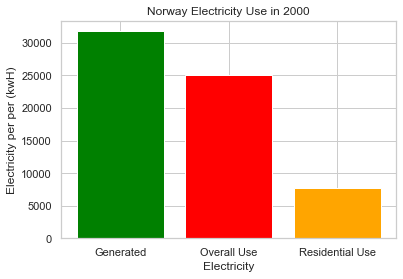

In [85]:
plt.bar(['Generated',
         'Overall Use',
         'Residential Use'],
        [elec_df.loc[1012].EGP,
         elec_df.loc[1012].EUP,
         elec_df.loc[1012].REUP],
       color=['green','red','orange'])

plt.title('Norway Electricity Use in {}'.format(elec_df.loc[1012].year))
plt.xlabel('Electricity')
plt.ylabel('Electricity per per (kwH)');

In [86]:
elec_df[elec_df.year==2000].describe()

,year,POP,EGP,REUP,EUP
count,65.0,6.500000e+01,65.000000,65.000000,65.000000
mean,2000.0,7.799680e+07,5755.507692,1476.338462,5239.646154
std,0.0,2.053229e+08,5566.134897,1658.396885,4918.563324
min,2000.0,5.920000e+05,120.000000,42.000000,105.000000
25%,2000.0,8.070000e+06,1990.000000,362.000000,1780.000000
50%,2000.0,2.320000e+07,4310.000000,966.000000,3990.000000
75%,2000.0,6.300000e+07,7140.000000,1910.000000,6640.000000
max,2000.0,1.290000e+09,31800.000000,7710.000000,25000.000000


Here we see in 2000, Norway was also at the top for overall electricity use and residential use as well.

### Research Question 2
#### Relating to question 1, how much of the generation was used and respectively how much was the contribution of the residential use?

###### Function - Electricity proportions

In [87]:
def elec_proportions(index):
    country_prop = (elec_df.loc[index].EUP/elec_df.loc[index].EGP)
    resi_prop = (elec_df.loc[index].REUP/elec_df.loc[index].EUP)
    spare_cap = (1-country_prop)

    print('{}\'s Electricity in {}:\n\
Consumption over generation: \t{:0.1f}%\n\
Residential consumption: \t{:0.1f}%\n\
Spare capacity: \t\t{:0.1f}%\n'.format(elec_df.loc[index].country,
                                     elec_df.loc[index].year,
                                     country_prop*100, 
                                     resi_prop*100, 
                                     spare_cap*100))
    return;

In [88]:
index=1012 # From Q1, pass on the index
elec_proportions(index)

Norway's Electricity in 2000:
Consumption over generation: 	78.6%
Residential consumption: 	30.8%
Spare capacity: 		21.4%



The electricity generated by Norway far exceeds its consumption with 21% spare capacity for the country.

The contribution residents contributes to the countries electricity use is approximately 31%.

### Research Question 3
#### If Norway was the top country in electricity generation, how did it compare with the remaining countries overall?

###### Function - Seaborn Bar Chart Plot

In [89]:
# Plot bar chart
def barchart(df,xcol,ycol,lgd_lab,colr,xname,yname,titlename,alph):
    # Statement to filter if colour was past in the argument
    if colr == False: # no custom colour
        plt_fig = sns.barplot(data=df, x=xcol, y=ycol, label=lgd_lab, edgecolor = 'w', alpha=alph, ci=None)
    else:    
        plt_fig = sns.barplot(data=df, x=xcol, y=ycol, label=lgd_lab, color=colr, edgecolor = 'w', alpha=alph, ci=None)
    
    plt_fig.set(xlabel=xname, ylabel=yname, title=titlename)
    return plt_fig;

##### Function - Plot EGP Barchart

In [90]:
def plot_global_egp(yr):
    # Use information from idxmax to extract EGP based on the year and 
    # sort in descending order 
    desc_order_egp=elec_df[elec_df.year==yr].sort_values('EGP', ascending=False)
    # Set figure size (x, y)
    fig, axes = plt.subplots(figsize = (15,5)) #plt.subplots(figsize = (25,15))
    # customise ticks, font sizes
    set_xticks(90,11,'center')
    set_yticks(0,10,'right')

    # send dataframe and x, y labels
    xcol='country' # dataframe x name
    ycol='EGP' # 
    lgd_lab=ycol
    colr=False
    xlab='Countries' # new x label name
    ylab='Electricity Generation per person (kWh)' # new y label name
    ti='Global Electricity Generation in {}'.format(yr) # title name
    a = 1 # alpha/transparency
    barchart(desc_order_egp, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a)

    # Set Font sizes
    font_size=13
    title_size=15
    axes_size=13
    # Call function
    plotfontsize(font_size, title_size, axes_size);

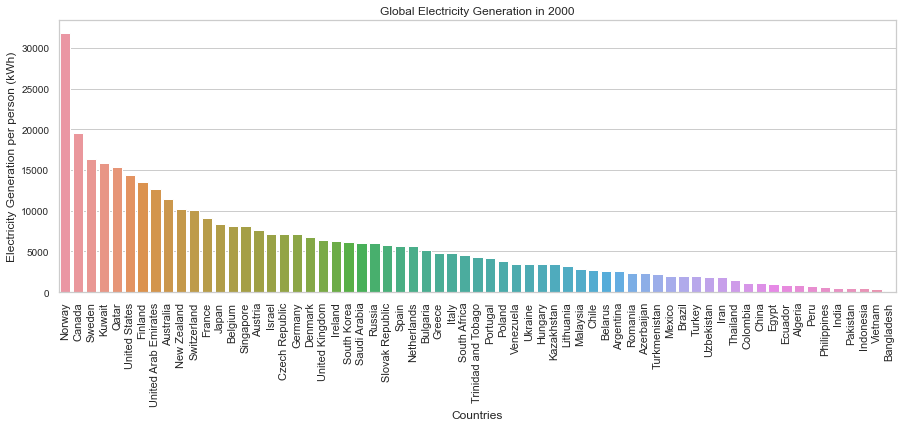

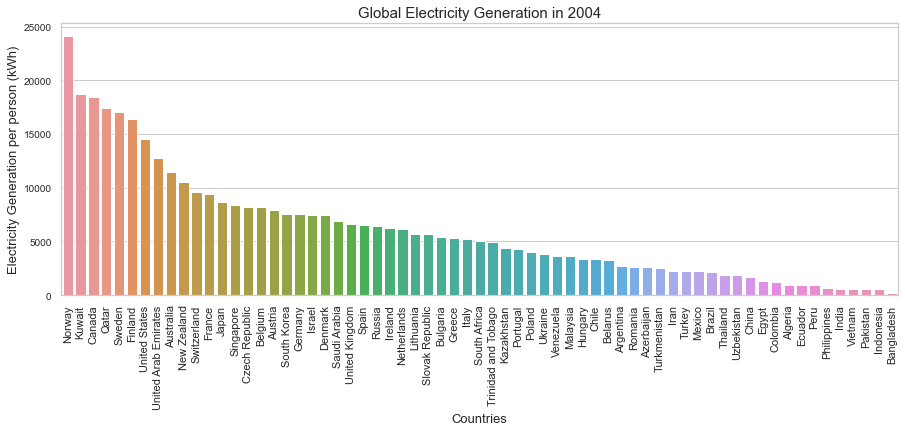

In [91]:
# Plot the global EGP for the year in question and compare with another year of interest
plot_global_egp(2000)
plot_global_egp(2004)

From the above, we see a change in position amongst the top contenders, specifically Kuwait who has dramatically improved there position over the 5 year period, whilst Norway maintained.

The above comparison provides an indication that Norway is stagnating, which will be investigated later on with a line plot to confirm this.

###### Function - Plot EUP Barchart

In [92]:
def plot_global_eup(yr):
    desc_order_eup=elec_df[elec_df.year==yr].sort_values('EUP',ascending=False)
    # Call function and set figure size (x, y)
    fig, axes = plt.subplots(figsize = (15,5))

    # customise ticks, font sizes
    set_xticks(90,11,'center')
    set_yticks(0,10,'right')

    # Call functions, send dataframe and x, y labels
    xcol='country' # dataframe x name
    ycol='EUP' #
    lgd_lab=ycol
    colr=False
    xlab='Countries' # new x label name
    ylab='Electricity Use per person (kWh)' # new y label name
    ti='Global Electricity Use in {}'.format(yr) # title name
    a = 1 # alpha/transparency
    barchart(desc_order_eup, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a)

    # Call functions and set font sizes
    font_size=12
    title_size=15
    axes_size=12
    # Call function
    plotfontsize(font_size,title_size,axes_size);

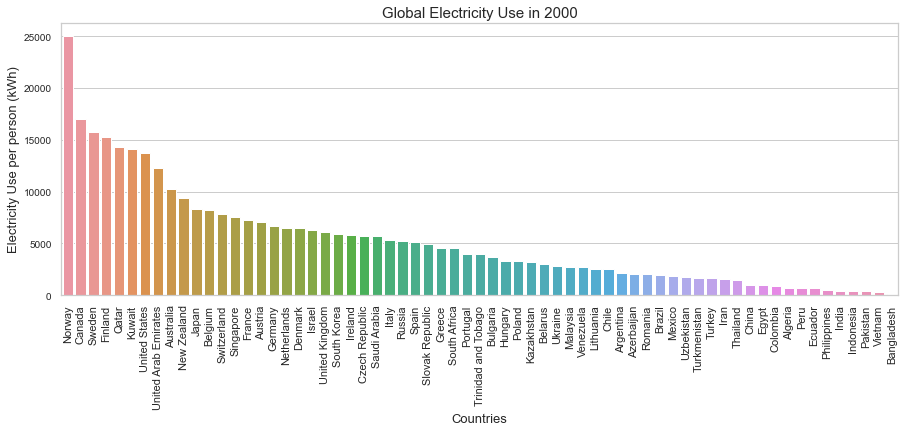

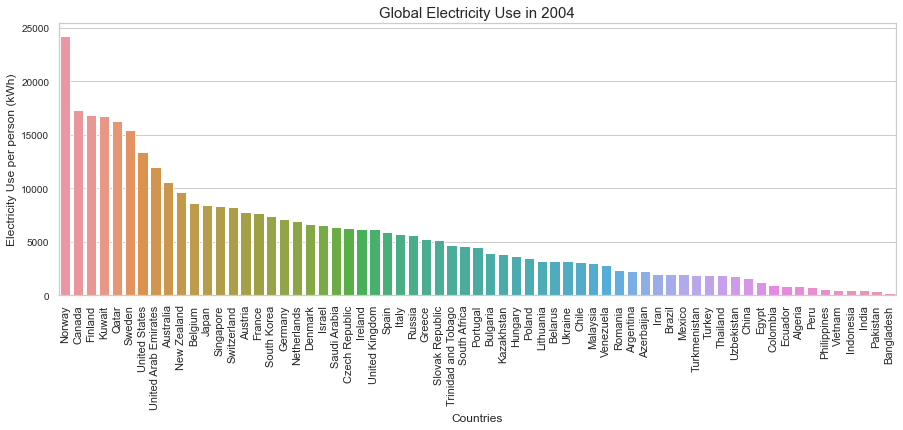

In [93]:
# Plot the global EUP for the year in question and compare with another year of interest
plot_global_eup(2000) # pass a single year
plot_global_eup(2004)

### Research Question 4
#### If Norway was the top country in electricity generation at the start of the decade, how did it compare with the remaining 5 top countries that generated electricity towards the end of the decade?

Below is a visual representation of the countries generation of electricity relative to Norways, in the year recorded to be known highest as per the records.

Using the previous dataframe, after finding the highest producing 

##### Function - Plot Stacked Barchart

In [94]:
def plotbar_comparison(yr,n_count):
    #sort by EGP since electricity use cannot exceed Generation
    top_gen = elec_df[elec_df.year==yr].sort_values('EGP',ascending=False).head(n_count)
    # Set figure size (x, y)
    fig, axes = plt.subplots(figsize = (8,3))

    # customise ticks, font sizes
    set_xticks(30,10,'right')
    set_yticks(0,10,'right')

    # Constant variables
    xcol='country' # dataframe x name
    xlab='Countries' # new x label name
    a=.7 # alpha/transparency
    
    # Prepare graph for largest Electricity Generation
    ycol='EGP'
    ylab='Electricity generation' # new y label name
    lgd_lab='Electricity generation'
    colr='g'
    ti='' # title name, initialise to prevent error
    # Call function
    barchart(top_gen, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a)


    # Prepare another graph for Electricity use and lay on top
    ycol='EUP'
    ylab='Electricity use' # new y label name
    lgd_lab='Total electricity use'
    colr='r' # enter inside ''
    ti='' # title name, initialise to prevent error
    # Call function
    barchart(top_gen, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a)

    # Prepare another graph for Residential electricity use and lay on top
    ycol='REUP'
    ylab='Electricity per person (kWh)' # new y label name
    lgd_lab='Residential electricity use'
    colr='b' # enter inside ''
    ti='Top {} Electricity Generators in {}'.format(n_count,yr) # title name
    # Call function
    barchart(top_gen, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a)

    # Set Font sizes
    font_size=12
    title_size=15
    axes_size=12
    plotfontsize(font_size,title_size,axes_size)
    
    axes.legend(ncol = 1, loc = 'upper right'); # relocate the legend

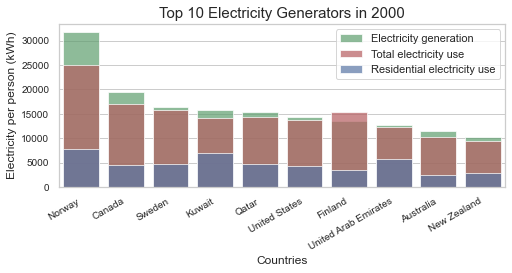

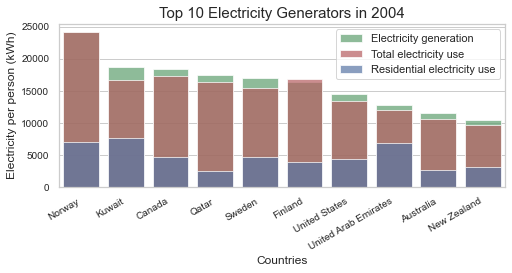

In [95]:
# Plot top 10 countries
plotbar_comparison(2000,10) # Year, No. countries from the top
plotbar_comparison(2004,10)

In [96]:
# List of top 5 electricity generating companies
top_egen_countries = ['Norway','Kuwait','Canada','Qatar','Sweden']

From the above plot of the overall population, the main 5 players in electricity generation are consistently Norway, Canada, Sweden, Kuwait and Qatar. 

Interesting to see that Norway and Finland have Electricity use overlapping its generation in 2004.

From this list we will investigate a small period of time and see the trends.

In [97]:
Num=5 # No. of countries from the top
top_gen = elec_df[elec_df.year==2000].sort_values('EGP',ascending=False).head(Num)

In [98]:
top_gen_index = list(top_gen[(top_gen.year==2000) & (top_gen.country.isin(top_egen_countries))].index)

In [99]:
for i in top_gen_index:
    elec_proportions(i)

Norway's Electricity in 2000:
Consumption over generation: 	78.6%
Residential consumption: 	30.8%
Spare capacity: 		21.4%

Canada's Electricity in 2000:
Consumption over generation: 	87.2%
Residential consumption: 	26.0%
Spare capacity: 		12.8%

Sweden's Electricity in 2000:
Consumption over generation: 	95.7%
Residential consumption: 	30.0%
Spare capacity: 		4.3%

Kuwait's Electricity in 2000:
Consumption over generation: 	89.2%
Residential consumption: 	49.2%
Spare capacity: 		10.8%

Qatar's Electricity in 2000:
Consumption over generation: 	92.9%
Residential consumption: 	33.0%
Spare capacity: 		7.1%



In 2000, Norway has plenty of spare capacity with Sweden being very close to reaching its limit.

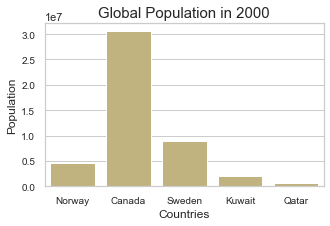

In [100]:
# Set figure size (x, y)
fig, ax = plt.subplots(figsize = (5,3))

# customise ticks, font sizes
plt.xticks(rotation=0, size=10)
plt.yticks(size=10)

xcol='country' # dataframe x name
ycol='POP'
xlab='Countries' # new x label name
ylab='Population' # new y label name
lgd_lab='Population'
colr='y'
ti='Global Population in 2000' # title name
a = 1 # alpha/transparency
barchart(top_gen, xcol, ycol, lgd_lab, colr, xlab, ylab, ti, a);

# Set Font sizes
font_size=12
title_size=15
axes_size=12
plotfontsize(font_size,title_size,axes_size)

From the above comparison between the three fields, it is interesting to see that despite the difference in population, Norway is generating electricity far greater then the others.
Canada is doing well at second place, given the capacity it is presently has. 

If there had been additional information such as a breakdown of how the electricity is generated rather then an aggregated total. From a google search, it would reveal that Norway is one of few countries where renewable energy is its source of electricity generation.

### Research Question 5
#### How does Norways Electricity history outlook appear for the remainder of the decade?

In [101]:
# Obtain a smaller sample of data
decade_elec_df = elec_df.loc[elec_df.year>=2000,:].sort_values(['EGP'],
                                                   ascending=[False])

In [102]:
nor_2000s = decade_elec_df.loc[decade_elec_df.country=='Norway']

In [103]:
nor_2000s.describe()

,year,POP,EGP,REUP,EUP
count,10.00000,1.000000e+01,10.000000,10.000000,10.000000
mean,2004.50000,4.636000e+06,27710.000000,7454.000000,24550.000000
std,3.02765,1.099697e+05,2640.054713,277.776889,701.189466
min,2000.00000,4.500000e+06,23500.000000,7030.000000,23200.000000
25%,2002.25000,4.555000e+06,26250.000000,7327.500000,24125.000000
50%,2004.50000,4.615000e+06,28000.000000,7430.000000,24750.000000
75%,2006.75000,4.707500e+06,29625.000000,7617.500000,24975.000000
max,2009.00000,4.830000e+06,31800.000000,7950.000000,25600.000000


**Plot Line Function**

In [104]:
def plotline_comparison(df,ycol,lab):
    return sns.lineplot(data=df, x='year', y=ycol, label=lab, ci=None)

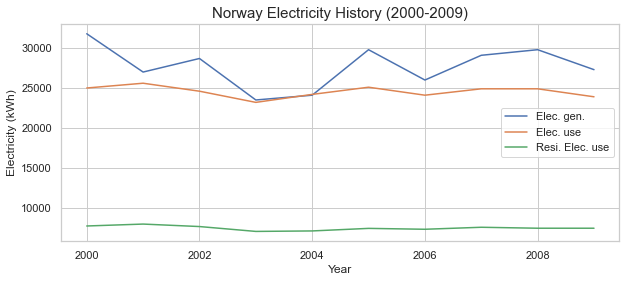

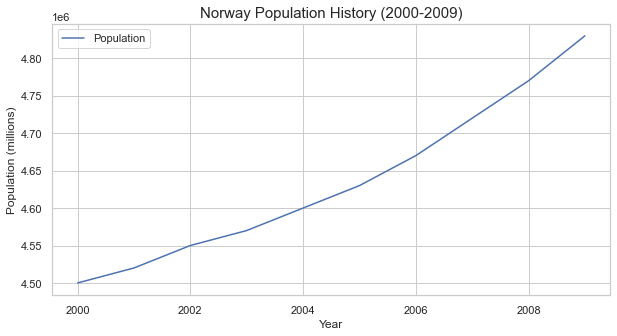

In [105]:
xcol='year' # dataframe x name
xlab='Year' # new x label name
ti='{} Electricity History ({}-{})'.format(nor_2000s.iloc[0,0],
                             nor_2000s.year.min(),
                             nor_2000s.year.max()) # title name

fig, ax = plt.subplots(figsize = (10,4))

e1 = ('EGP','Elec. gen.')
e2 = ('EUP','Elec. use')
e3 = ('REUP','Resi. Elec. use')

for elec, tricity in [e1,e2,e3]:
    plt_fig=plotline_comparison(nor_2000s,elec,tricity)
    
plt_fig.set(xlabel=xlab, ylabel='Electricity (kWh)', title=ti)

# Set Font sizes
font_size=12
title_size=15
axes_size=12
plotfontsize(font_size,title_size,axes_size)

# Plot population on a separate figure
ti='{} Population History ({}-{})'.format(nor_2000s.iloc[0,0],
                             nor_2000s.year.min(),
                             nor_2000s.year.max()) # title name
fig, ax = plt.subplots(figsize = (10,5))
plt_fig_pop=plotline_comparison(nor_2000s,'POP','Population')
plt_fig_pop.set(xlabel='Year', ylabel='Population (millions)', title=ti);

Norways generation is fairly consistent despite the steady increase in population. The decline in 2000 to 2003 could suggest the present infrastructure being inadequate based on the increasing population.

During the period between 2003 and 2004 is most concerning as the electricity generation and use, slightly overlapped, which suggests blackouts/power outages due to lack of electricity.

In [106]:
# Drop populations as it is not required
top_countries=decade_elec_df#.drop(decade_elec_df.columns[2], axis=1)

In [107]:
topmask = top_countries.country.isin(top_egen_countries)

In [108]:
# top electricity country mask - TECM
TECM = top_countries[topmask]

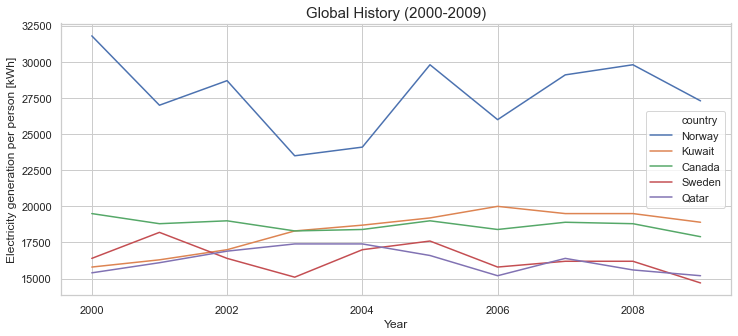

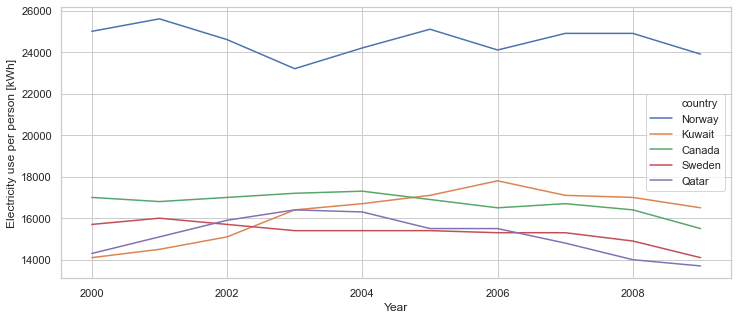

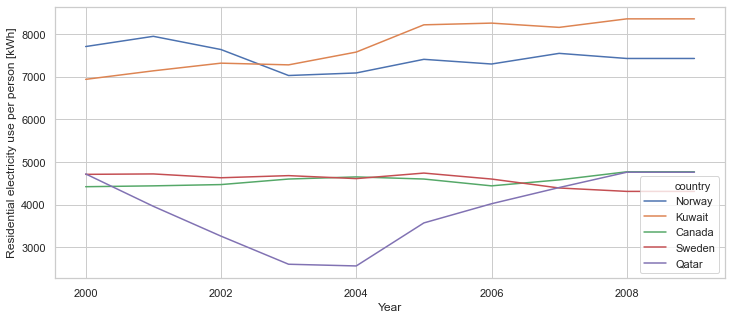

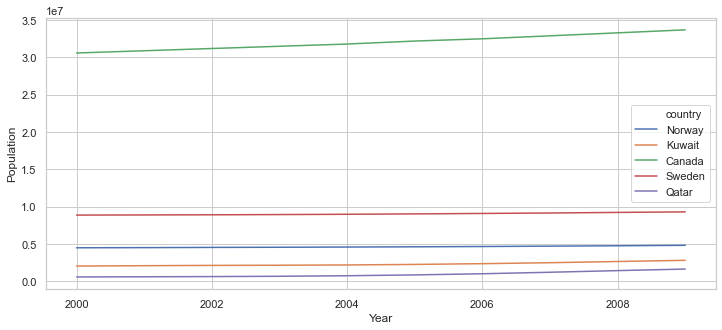

In [109]:
ti='Global History ({}-{})'.format(TECM.year.min(), TECM.year.max()) # title name

fig, ax = plt.subplots(figsize = (12,5))
plt_linefig = sns.lineplot(data=TECM, y='EGP', x='year', hue='country', ci=None)#, ax=ax[0])
plt_linefig.set(xlabel='Year', ylabel='Electricity generation per person [kWh]', title=ti)

fig, ax = plt.subplots(figsize = (12,5))
plt_linefig = sns.lineplot(data=TECM, y='EUP', x='year', hue='country', ci=None)#, ax=ax[1])
plt_linefig.set(xlabel='Year', ylabel='Electricity use per person [kWh]')

fig, ax = plt.subplots(figsize = (12,5))
plt_linefig = sns.lineplot(data=TECM, y='REUP', x='year', hue='country', ci=None)#, ax=ax[2])
plt_linefig.set(xlabel='Year', ylabel='Residential electricity use per person [kWh]')

fig, ax = plt.subplots(figsize = (12,5))
plt_linefig = sns.lineplot(data=TECM, y='POP', x='year', hue='country', ci=None)#, ax=ax[2])
plt_linefig.set(xlabel='Year', ylabel='Population');

On the first graph, electricity generation, Canada and Kuwait appear to have the steadier plots indicating better management of electricity vs the increasing population shown in the fourth graph.

Although quite difficult to tell, the Population of each country has increased, whilst Canada is the most prominent.

### Research Question 6
#### How does the overall spread of data appear for the remainder of the decade?

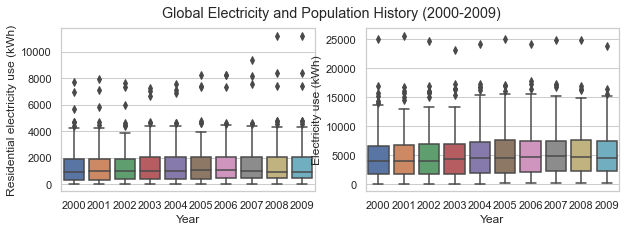

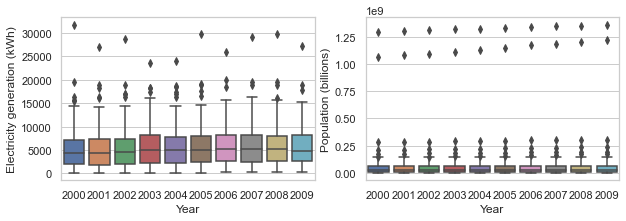

In [110]:
fig, ax = plt.subplots(figsize = (10,3), ncols = 2)
ti='Global Electricity and Population History ({}-{})'.format(TECM.year.min(), TECM.year.max()) # title name

fig.suptitle(ti,ha='center')
bx1 = sns.boxplot(data=decade_elec_df, y='REUP', x='year', ax=ax[0])
bx1.set(xlabel='Year', ylabel='Residential electricity use (kWh)')
bx1 = sns.boxplot(data=decade_elec_df, y='EUP', x='year', ax=ax[1])
bx1.set(xlabel='Year', ylabel='Electricity use (kWh)')

fig, ax = plt.subplots(figsize = (10,3), ncols = 2)
bx2 = sns.boxplot(data=decade_elec_df, y='EGP', x='year', ax=ax[0])
bx2.set(xlabel='Year', ylabel='Electricity generation (kWh)')
bx2 = sns.boxplot(data=decade_elec_df, y='POP', x='year', ax=ax[1])
bx2.set(xlabel='Year', ylabel='Population (billions)');


In [111]:
decade_elec_df.describe()

,year,POP,EGP,REUP,EUP
count,650.000000,6.500000e+02,650.000000,650.000000,650.000000
mean,2004.500000,8.175323e+07,6053.607692,1598.967692,5571.463077
std,2.874493,2.136940e+08,5289.629897,1784.354027,4899.659417
min,2000.000000,5.920000e+05,120.000000,42.000000,105.000000
25%,2002.000000,8.122500e+06,2292.500000,431.250000,2010.000000
50%,2004.500000,2.510000e+07,4850.000000,983.500000,4485.000000
75%,2007.000000,6.507500e+07,8007.500000,2050.000000,7337.500000
max,2009.000000,1.360000e+09,31800.000000,11200.000000,25600.000000


Here the bar plot provides a visual representation of the basic statistical measures for the sample.

For the past decade, the medians for all columns are on the lower end of the scale, with several outliers that exceed the upper range.

<a id='conclusions'></a>
## Conclusions

It is important to note that the figures provided are based on a kilo-watt hour per person value. With this is mind, the results revealed Norway was a country leading the electricity generation and overall use. However as the dataframes were merged and joined, this conclusion is valid based on the consideration of the sample and not the overall population portion of dataset such as the countries and values that were omitted.


Delving deeper into question 3, it would interesting to know what country from each continent was the highest producer, i.e. For Europe it would be Norway?


Provided the dataset was available, it would interesting to see the relationships between carbon emissions relative to electricity generated.


As mentioned above, the key limitation of the results are the rows/columns excluded from the final table due to the nature of inner joins. As discovered in the initial investigation, there were tables which had inconsistent number of years recorded, similarly with the countries. Below is one example, where it was obtained from the initial population directly contradicts Norway being the top electricity consuming country in 2013.

In [112]:
old_piv_eup_df.loc[old_piv_eup_df['EUP'].idxmax()]

country    Iceland
year          2013
EUP          54800
Name: 7366, dtype: object

<a id='mods'></a>
## Modifications

Below are the list of changes during the cleaning and EDA process to further refine the coding for simplicity, remove repetitiveness where possible or removed simply because it was made redundant.

### Cast types
Adjusted into a function and repeated where necessary.

- new_egp_df['year'] = new_egp_df['year'].astype('int64')
- new_egp_df['EGP'] = new_egp_df['EGP'].astype('int64')

- new_eup_df['year'] = new_eup_df['year'].astype('int64')
- new_eup_df['EUP'] = new_eup_df['EUP'].astype('int64')

- new_reup_df['year'] = new_reup_df['year'].astype('int64')
- new_reup_df['REUP'] = new_reup_df['REUP'].astype('int64')

- new_pop_df['year'] = new_pop_df['year'].astype('int64')

### Merge dataframes
Before utilising the pandas merge function on inner join, the countries and years were dropped manually for ease of combining the dataframes. Reading further into the merge function highlighted the join type, inner, allowing only matching items to be combined together.
#### Trim years
Initially years as columns, were trimmed during the cleaning stage before concatenating the dataframes together.
Drop the years not matching up with the agreed dataframe i.e. Electricity Generation. 

Ensure EGP Years begin at 1985.
- dropyears_eup = eup_df.loc[:,'1960':'1984']

Print and check dataframe is correct

dropyears_eup.head(2)
- eup_df.drop(dropyears_eup,axis=1,inplace=True)

Drop irrelevant years out of range and change in place.
Print to check operation succeeded
- eup_df


####  Trim countries
As above.
Query the Electricity Generation dataframe based on the list of countries to be checked, reveals the only relevant countries are Iran, Russia and South Korea. All others can be ignored. The only relevant countries from the rejected list of countries are, Iran, Russia and South Korea. All others can be ignored and do not need to be added to the exempt list.

- diff_eup = np.setdiff1d(eup_df.country, egp_df.country) 
- rename to suit action/task i.e. new eup labels
--  for i in diff_eup:
--    print(i)
    
- type(diff_eup) # verify data type
- eup_df['country'].isin(diff_eup) # create a mask to filter the countries only
- dropindex = eup_df[eup_df['country'].isin(diff_eup)].index # obtain the index to drop

Above are the list of countries that are not in the Elec. Generation dataframe are # referenced by index and are dropped in the following steps.
- eup_df.drop(dropindex, axis=0,inplace=True) 

change in place and check shape to verify
- eup_df
- eup_df.shape

### Visualization
#### Heatmaps
Intially thought it would be a great indicator for each country however the end presentation was not suitable.

- sns.set(style='whitegrid')
- plt.subplots(figsize=(20,20))

- hm_eup=sns.heatmap(piv2_eup_df, 
            cmap="RdBu",
            square=True,
            robust=True,
            linewidths=0.005,
            xticklabels=1, yticklabels=1,
            vmax=piv1_eup_df.max().max(),
            vmin=piv1_eup_df.min().min());

- hm_eup.set(xlabel='Year',
           ylabel='Countries',
           title='Global Electricity Use Per Person');
           
           
####  Plot bar function
It is much easier to utilise matplotlib for producing a stacked basic bar chart as the effort required to plot using seaborn.

- max_df=elec_df.iloc[1012,[3,5,4]]
- max_df.index
- max_df.values
- sns.set(style="whitegrid")
- testplot = sns.barplot(x=max_df.index,
                       y=max_df.values,
                       palette='hls');
                       
#### Plot line function
- sns.lineplot(data=nor_2000s, x=xcol, y='EGP', label='Electricity generation', alpha=alph, ci=None) # , ax=ax[0]
- sns.lineplot(data=nor_2000s, x=xcol, y='EUP', label='Electricity use', alpha=alph, ci=None)
- sns.lineplot(data=nor_2000s, x=xcol, y='REUP', label='Residential electricity use', alpha=alph, ci=None)

<a id='refs'></a>
## References

References:
- https://stackoverflow.com/questions/46502943/reading-csv-files-in-a-loop-using-pandas-then-concatenating-them
- https://stackoverflow.com/questions/38368318/installing-a-pip-package-from-within-a-jupyter-notebook-not-working
- https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
- https://www.ritchieng.com/pandas-selecting-multiple-rows-and-columns/
- https://stackoverflow.com/questions/46793448/plotting-series-using-seaborn
- https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
- https://matplotlib.org/2.0.2/api/colors_api.html
- https://stackoverflow.com/questions/51933830/using-multiple-variables-in-a-for-loop-in-python
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html